## Prostate Cancer Recurrence Analysis
#### Elayni Enoly S. Franco

### Introduction
    In this notebook, I explore and analyze the dataset "Blood Storage" from Cleveland Clinic Lerner Research Institute (http://www.lerner.ccf.org/qhs/datasets/).

    The dataset was originally used to analyze how blood storage can influence in prostate cancer recurrence. In this work, however,  the objective is to understand if other columns influence such recurrence.

    As someone with academic and professional background in healthcare, I was naturally inclined to do some research in the area. Upon coming across several studies and datasets, this one caught my eye because I could approximately foresee how I could work with the data.

### Dataset Description

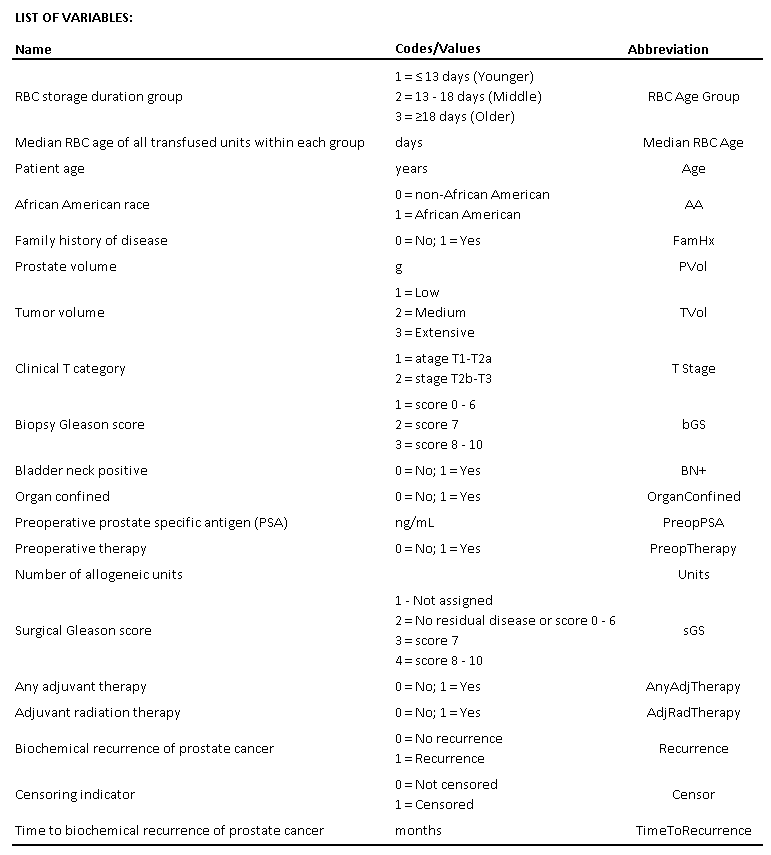


### Initial Exploration



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set pastel color for plots
sns.set(style="ticks", palette="pastel")

# import dataset and view first datas
df = pd.read_csv("https://raw.githubusercontent.com/elayni/prostate-cancer-recurrence-analysis/main/Dataset/BloodStorage.csv", error_bad_lines=False)

df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [3]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
311    False
312    False
313    False
314    False
315    False
Length: 316, dtype: bool

In [5]:
# info() makes it possible to see missing data, data types, column names, and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RBC Age Group     316 non-null    int64  
 1   Median RBC Age    316 non-null    int64  
 2   Age               316 non-null    float64
 3   AA                316 non-null    int64  
 4   FamHx             316 non-null    int64  
 5   PVol              307 non-null    float64
 6   TVol              310 non-null    float64
 7   T Stage           303 non-null    float64
 8   bGS               314 non-null    float64
 9   BN+               316 non-null    int64  
 10  OrganConfined     316 non-null    int64  
 11  PreopPSA          313 non-null    float64
 12  PreopTherapy      316 non-null    int64  
 13  Units             316 non-null    int64  
 14  sGS               316 non-null    int64  
 15  AnyAdjTherapy     316 non-null    int64  
 16  AdjRadTherapy     316 non-null    int64  
 1

In [7]:
# count missing data
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 9
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             3
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     1
dtype: int64

In [34]:
# drop categorical data
df_nocatg = df[["Age", "PVol", "PreopPSA", "Units", "TimeToRecurrence"]]

    There is no "best" number of bins, and different bin sizes can reveal different features of the data. To determine a number of bins so we can have a better visualization from the histogram, we make use of Sturges' formula. This formula is derived from a binomial distribution and implicitly assumes an approximately normal distribution. So, it can be used as a criterion to determine the number of classes or ranges needed to graph a set of statistical data. Among others of its kind, Sturges' formula was chosen for this work due to its ease of application. 

In [35]:
# Sturges for bins number
k = 1 + 3.322 * np.log10(316)

<ipython-input-36-4f4cf55cf852>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_nocatg.hist(ax=fig, bins= int(k), grid=True)


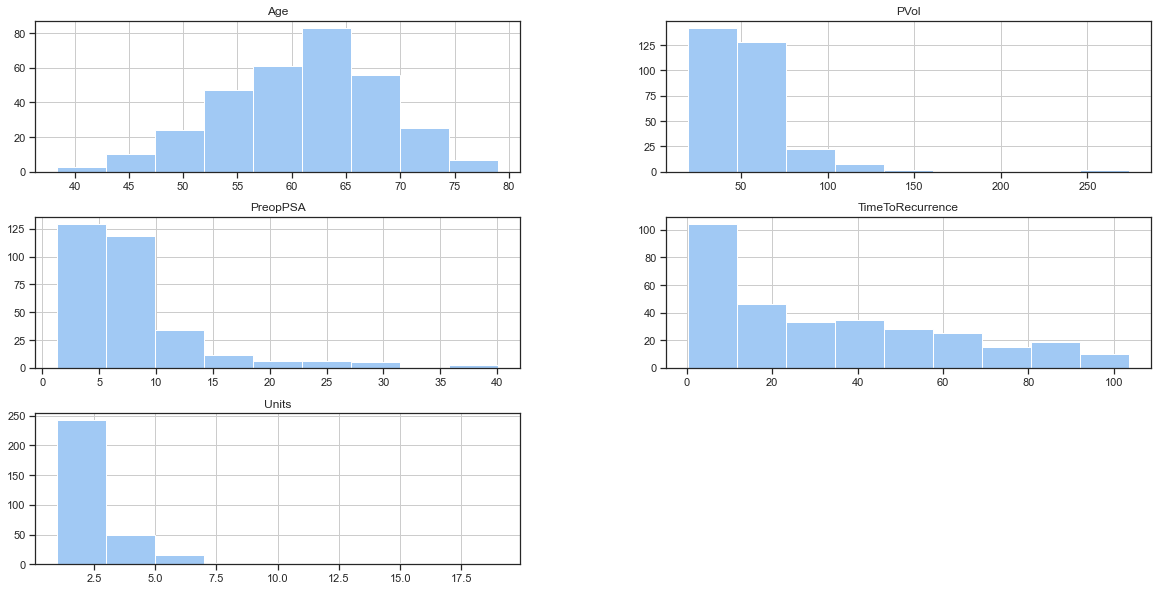

In [36]:
# To see data distribution
fix, fig = plt.subplots(figsize=(20,10))
df_nocatg.hist(ax=fig, bins= int(k), grid=True)
plt.show()

In [17]:
# Percent of race, 17% is African American and 82% can be white, asian or indigenous people,
# but because they are American people, most of them are likely to be white.
race = df['AA'].value_counts()
race/len(df)

0    0.825949
1    0.174051
Name: AA, dtype: float64

### Data Pre-processing

In [18]:
df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [37]:
# replacing missing data to column median
df['PVol'].fillna(df['PVol'].median(), inplace=True)
df['PreopPSA'].fillna(df['PreopPSA'].median(), inplace=True)
df['TimeToRecurrence'].fillna(df['TimeToRecurrence'].median(), inplace=True)
# only categorical missing data 
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 0
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             0
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     0
dtype: int64

In [38]:
# drop categorical missing data
df = df.dropna()

In [39]:
# drop columns that will not be useful to answer questions
df = df.drop(["RBC Age Group", "Median RBC Age"], axis = 1)

In [40]:
# checck dataframe
df.head(3)

,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10


#### Centrality and Dispersion Measures
    We don't use df.mean() because some columns are normalized to categorical data.

In [41]:
df_numeric = df[["Age", "PVol", "PreopPSA", "Units", "TimeToRecurrence"]]

# centrality and dispersion measures
# means and medians
df_means = pd.DataFrame(np.mean(df_numeric, axis = 0), columns= ["means"])
df_medians = pd.Series(np.median(df_numeric, axis=0), name = "medians")

df_means.reset_index(drop=True, inplace = True)
df_c = pd.concat([df_means, df_medians], axis=1)

df_c.rename(index = {0: "Age", 1: "Pvol", 2: "PreopPSA",
               3:"Units", 4:"TimeToReccurence"}, inplace= True)

# dataframe with centrality measures - mean and median
df_c

,means,medians
Age,61.063636,61.90
Pvol,55.759259,49.00
PreopPSA,8.251111,6.20
Units,2.383838,2.00
TimeToReccurence,33.567778,26.77


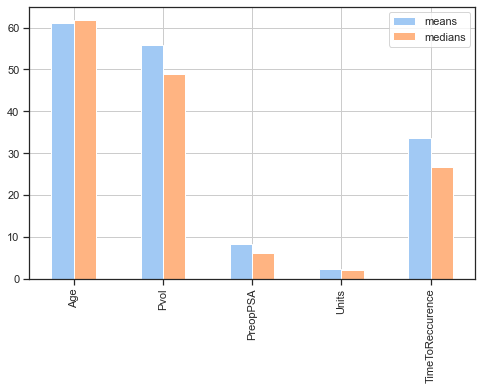

In [42]:
# comparison between means and medians
df_c.plot(kind = 'bar', grid=True, figsize=(8,5))

In [43]:
# mode for categorical data
df_catg = df[["AA", "FamHx", "TVol", "T Stage", "bGS", "BN+", "OrganConfined",
             "PreopTherapy", "sGS", "AnyAdjTherapy", "AdjRadTherapy", "Recurrence", "Censor"]]

df_catg.mode()

,AA,FamHx,TVol,T Stage,bGS,BN+,OrganConfined,PreopTherapy,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor
0,0,0,2.0,1.0,1.0,0,1,0,3,0,0,0,1


In [44]:
# variance
np.var(df_numeric)

Age                  53.250328
PVol                846.115950
PreopPSA             37.343326
Units                 3.145597
TimeToRecurrence    824.442434
dtype: float64

In [45]:
# standard deviation
df_numeric.std()

Age                  7.309598
PVol                29.137166
PreopPSA             6.121232
Units                1.776577
TimeToRecurrence    28.761567
dtype: float64

In [46]:
df.shape

(297, 18)

#### Visualization

Text(0.5, 1.0, 'Any Adjuvant Therapy and Time to Recurrence')

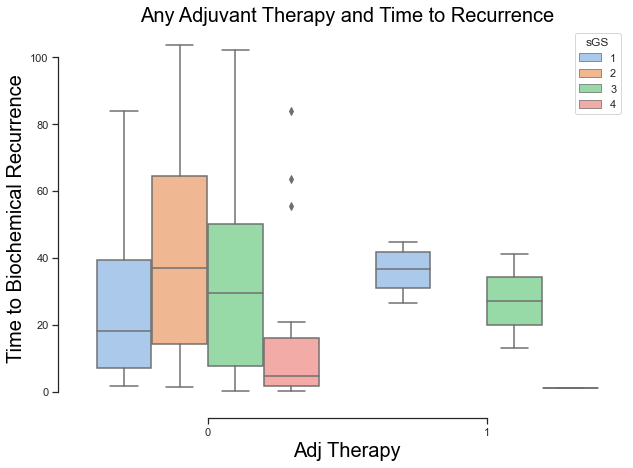

In [48]:
# Draw a boxplot
plt.figure(figsize=(10,7))
sns.boxplot(x="AnyAdjTherapy", y="TimeToRecurrence",
            hue="sGS", data=df)
sns.despine(offset=10, trim=True)
plt.xlabel('Adj Therapy', c ='black', fontsize=20)
plt.ylabel('Time to Biochemical Recurrence',c='g', color = 'black', fontsize=20)
plt.title('Any Adjuvant Therapy and Time to Recurrence', c='black', fontsize=20)

# some outliers in pacientes with 4 surgical Gleason score without adjuvant therapy

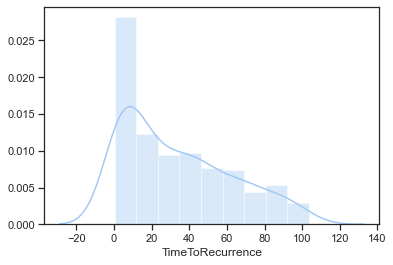

In [49]:
# Sturges for bins number
k = 1 + 3.322 * np.log10(297)


sns.distplot(df["TimeToRecurrence"], bins = int(k))

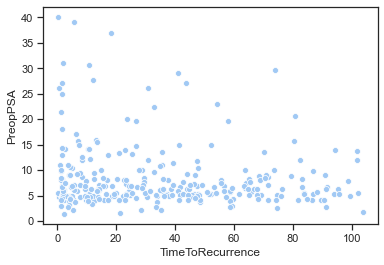

In [50]:
# dispersion
ns.scatterplot(data = df, x = "TimeToRecurrence", y = "PreopPSA")

In [51]:
# Correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
Age,1.000000,-0.024264,-0.102818,0.287307,-0.090404,0.003531,0.044850,-0.153700,-0.068833,-0.038046,-0.065045,0.016089,0.083405,-0.046674,-0.030774,0.017008,-0.017008,0.064720
AA,-0.024264,1.000000,-0.081702,-0.030033,0.045794,-0.074346,-0.023116,0.124778,0.025109,0.108834,-0.002867,-0.024592,0.022225,-0.009262,-0.025836,0.071264,-0.071264,-0.082977
FamHx,-0.102818,-0.081702,1.000000,0.019386,-0.025693,0.014295,-0.025577,-0.025259,0.016690,-0.069737,-0.101042,0.000232,0.089850,0.025123,-0.030766,-0.103641,0.103641,-0.069398
PVol,0.287307,-0.030033,0.019386,1.000000,-0.183566,-0.084859,0.015832,-0.070312,0.055137,0.238676,-0.136941,0.069470,-0.009232,-0.070820,-0.017703,-0.001467,0.001467,0.077551
TVol,-0.090404,0.045794,-0.025693,-0.183566,1.000000,0.303626,0.299160,0.228656,-0.483314,0.294431,0.128673,-0.123089,0.210579,0.196076,0.073355,0.303387,-0.303387,-0.107887
T Stage,0.003531,-0.074346,0.014295,-0.084859,0.303626,1.000000,0.436488,0.321117,-0.375601,0.268857,0.280653,-0.077814,-0.059189,0.222976,-0.020899,0.239060,-0.239060,-0.152740
bGS,0.044850,-0.023116,-0.025577,0.015832,0.299160,0.436488,1.000000,0.171574,-0.370313,0.288790,0.337446,-0.027507,0.041555,0.238396,0.125723,0.349428,-0.349428,-0.255963
BN+,-0.153700,0.124778,-0.025259,-0.070312,0.228656,0.321117,0.171574,1.000000,-0.151286,0.258109,0.302058,-0.069671,-0.176945,0.343895,-0.014322,0.124778,-0.124778,-0.064761
OrganConfined,-0.068833,0.025109,0.016690,0.055137,-0.483314,-0.375601,-0.370313,-0.151286,1.000000,-0.212079,-0.168890,0.032972,-0.122811,-0.210090,-0.078598,-0.240545,0.240545,0.101030
PreopPSA,-0.038046,0.108834,-0.069737,0.238676,0.294431,0.268857,0.288790,0.258109,-0.212079,1.000000,0.229456,0.019184,-0.085203,0.155966,0.035657,0.248745,-0.248745,-0.097288


### Does the size of the tumor influence time to recurrence?
The original question "Does the size of the tumor influence to recurrence?" cannot be answered. We were able to see inconsistency in the data between columns Recurrence and TimeToRecurrence.

In [52]:
# Correlation
df['TimeToRecurrence'].corr(df['TVol'])

# indicates a insignificant correlation.

-0.1078873618484599

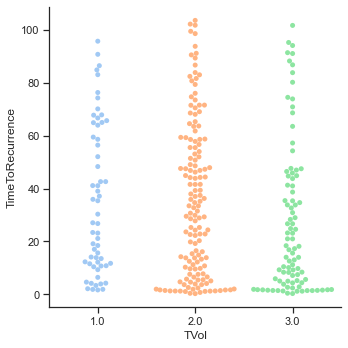

In [53]:
# the distribuition of TVol categories show us higher agglomeration in TVol = 2, indicating that data cleaning is necessary
sns.catplot(x="TVol", y="TimeToRecurrence", kind="swarm", data= df)

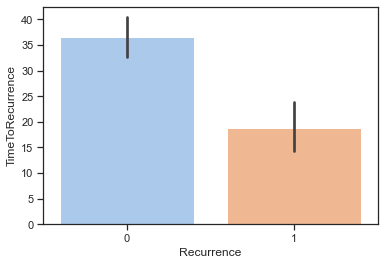

In [54]:
# inconsistency
sns.barplot(data=df, x="Recurrence", y="TimeToRecurrence")

In [55]:
# if count the positive censoring indicator, we will have the same number of non-recurrences
# maybe, all non-recurrences cases are recurrence cases
rec = df['Recurrence'].value_counts()
censor = df['Censor'].value_counts()

print(rec)
print(censor)

0    248
1     49
Name: Recurrence, dtype: int64
1    248
0     49
Name: Censor, dtype: int64


### Is any adjuvant therapy effective so that there is no recurrence?
This question have the same problem as the previous one: inconsistent data.
So, let's look at the time of recurrence.

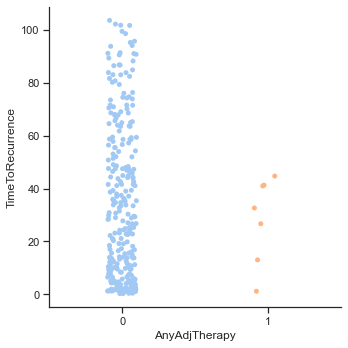

In [56]:
# agglomeration cases in 0 to Any Adjuvant Therapy. 
# This could answer something positive about adjuvant therapies, but we see the need for data cleaning.
sns.catplot(data = df, x = "AnyAdjTherapy", y = "TimeToRecurrence")

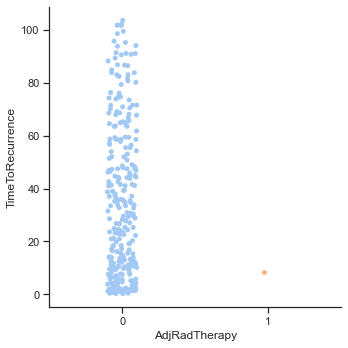

In [57]:
# the same for radiation therapy
sns.catplot(data = df, x = "AdjRadTherapy", y = "TimeToRecurrence")

### Is there a recurrence only in patients who had a high Gleason score?

(array([173.,   0.,   0.,   0.,   0.,  92.,   0.,   0.,   0.,  32.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

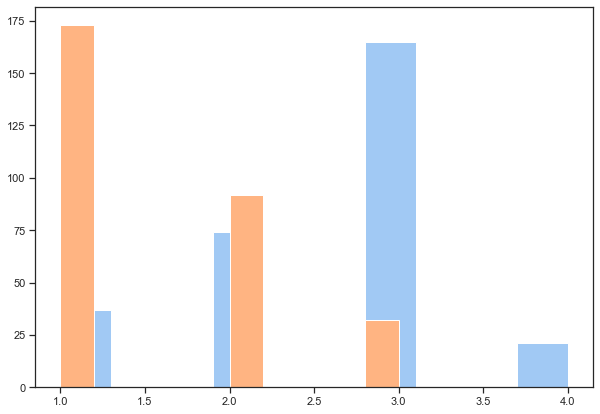

In [58]:

plt.figure(figsize=(10,7))
plt.hist(df["sGS"])
plt.hist(df["bGS"])

In [33]:
df['sGS'].value_counts()

3    172
2     85
1     38
4     21
Name: sGS, dtype: int64

In [34]:
df['bGS'].value_counts()

1.0    189
2.0     93
3.0     32
Name: bGS, dtype: int64

### Conclusions 
    In this study, it was possible to learn the importance of having a clean dataset before beginning to extract any information. 
    For instance, the dataset is very unbalanced, as it can be seen [...]. In order to fix that, several things can be done, such as [...].
    Another major flaw encountered in this dataset was the amount of inconsistent data, as can be seen in/at [...]. That can be avoided by [...].
    Future works
    Improvements (?)